# <font color=purple size=10>Desafio Final: Previsão de Doenças Cardíacas</font>
***

<font color=purple size=5>Squad Bertha Lutz</font>

# <font color=purple size=5>Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import  linear_model 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from operator import itemgetter
from scipy.stats import ttest_ind,f_oneway, skewnorm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

sns.set_style("whitegrid")
sns.set_palette("muted")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color=purple size=5>Importando data set



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Heart_disease_statlog.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


### Transformando variáveis categóricas em Object 

In [ ]:
df[['sex','cp','fbs','restecg','exang','slope','ca','thal']] = df[['sex','cp','fbs','restecg','exang','slope','ca','thal']].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    object 
 2   cp        270 non-null    object 
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    object 
 6   restecg   270 non-null    object 
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    object 
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    object 
 11  ca        270 non-null    object 
 12  thal      270 non-null    object 
 13  target    270 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 29.7+ KB


**<font color=purple size=5> Análise exploratória dos dados**

##<font color=purple size=5> 1 - Entenda a distribuição de variáveis

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
5,65,1,3,120,177,0,0,140,0,0.4,0,0,3,0
6,56,1,2,130,256,1,2,142,1,0.6,1,1,2,1
7,59,1,3,110,239,0,2,142,1,1.2,1,1,3,1
8,60,1,3,140,293,0,2,170,0,1.2,1,2,3,1
9,63,0,3,150,407,0,2,154,0,4.0,1,3,3,1


**Análise por idade**

Text(0.5, 1.0, 'Boxplot Idade')

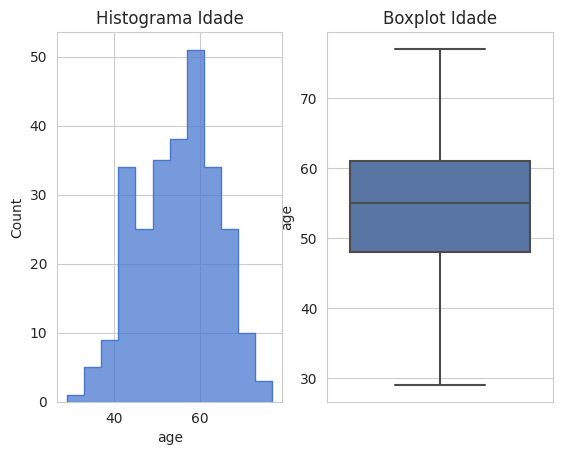

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="age", element="step", ax = ax[0]).set_title("Histograma Idade")
sns.boxplot( y="age", data=df, ax= ax[1]).set_title("Boxplot Idade")

**Observações**: A idade segue uma distribuição normal, levemente assímetrica à esquerda.

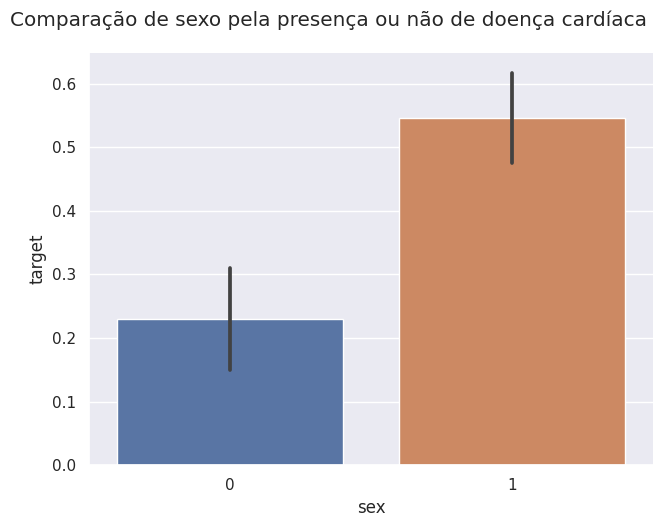

In [ ]:
g = sns.catplot(data=df, x="sex", y="target", kind="bar")
g.fig.suptitle("Comparação de sexo pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**Tipo de dor torácica sentida pelo paciente**

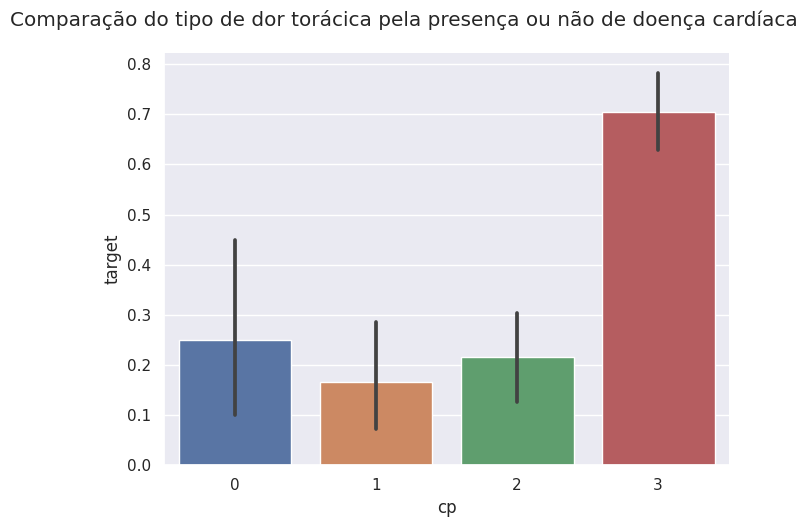

In [ ]:
g = sns.catplot(data=df, x="cp", y="target", kind="bar")
g.fig.suptitle("Comparação do tipo de dor torácica pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**Nível de pressão arterial do paciente no modo de repouso em mm/HG**

Text(0.5, 1.0, 'Boxplot Pressão Arterial (em Repouso)')

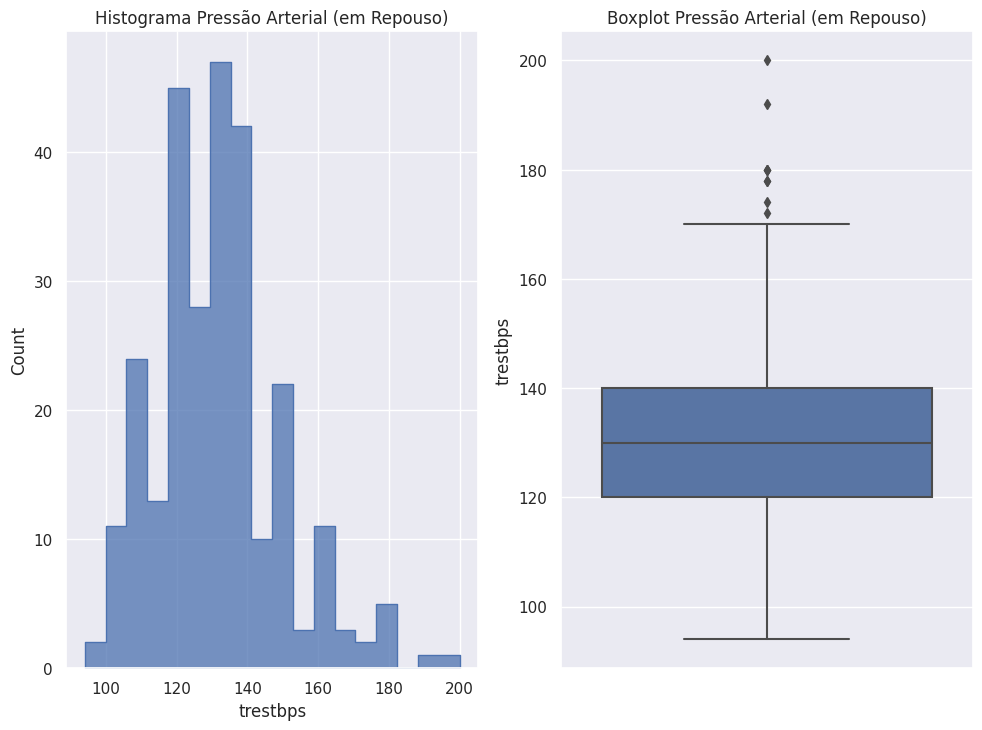

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="trestbps", element="step", ax = ax[0]).set_title("Histograma Pressão Arterial (em Repouso)")
sns.boxplot( y="trestbps", data=df, ax= ax[1]).set_title("Boxplot Pressão Arterial (em Repouso)")

**Colesterol sérico em mg/dl**

Text(0.5, 1.0, 'Boxplot Colesterol Sérico')

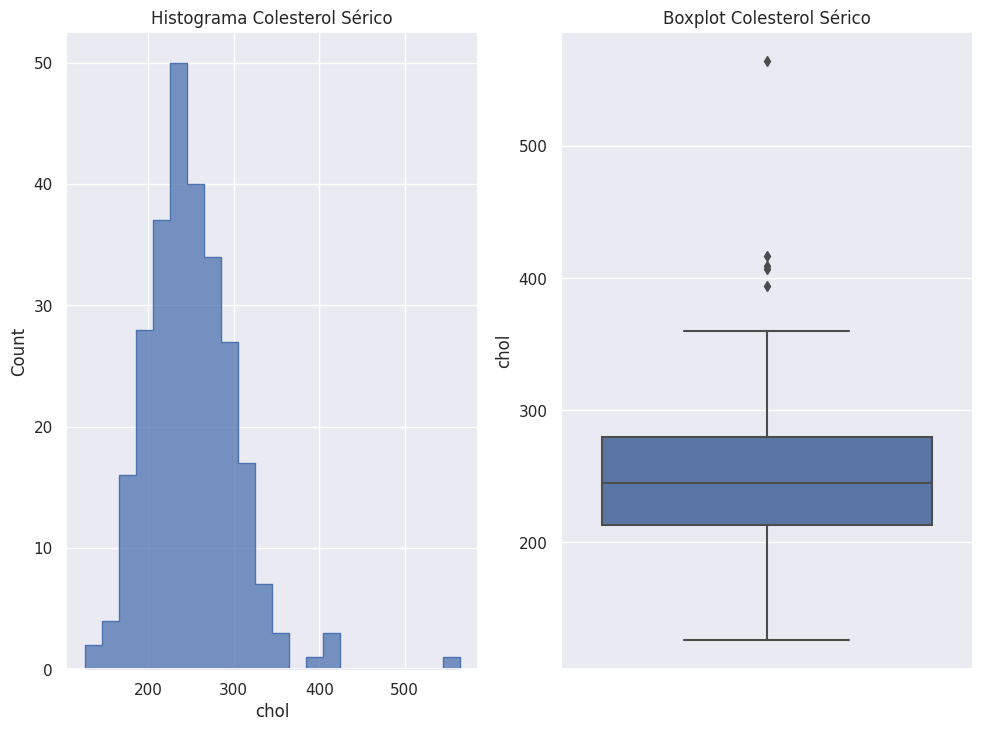

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="chol", element="step", ax = ax[0]).set_title("Histograma Colesterol Sérico")
sns.boxplot( y="chol", data=df, ax= ax[1]).set_title("Boxplot Colesterol Sérico")

**Níveis de açúcar no sangue em jejum > 120 mg/dl** 


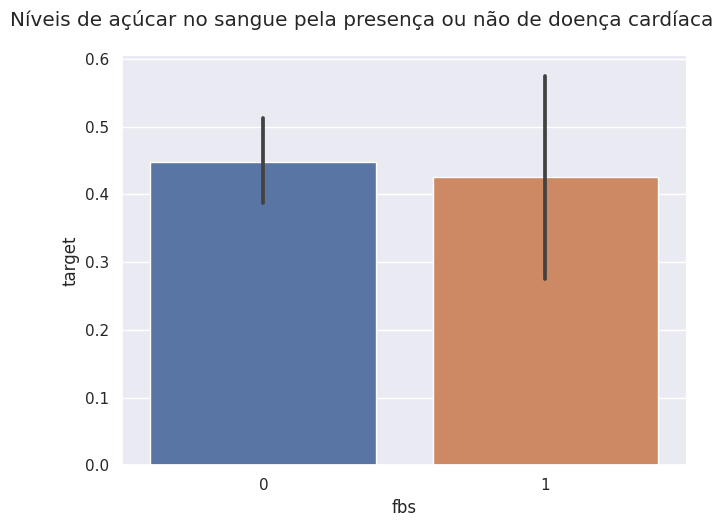

In [ ]:
g = sns.catplot(data=df, x="fbs", y="target", kind="bar")
g.fig.suptitle("Níveis de açúcar no sangue pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**Resultado do eletrocardiograma em repouso**


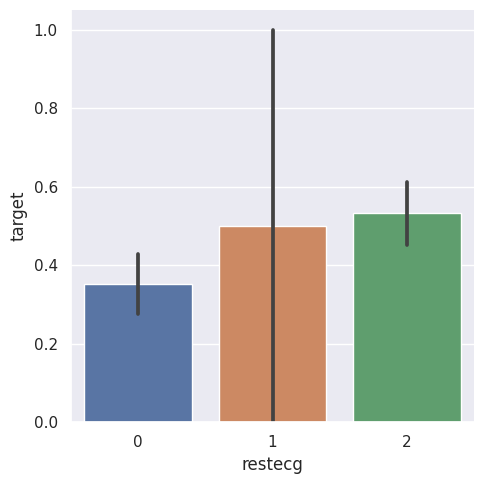

In [ ]:
sns.catplot(data=df, x="restecg", y="target", kind="bar")
g.fig.suptitle("Eletrocardiograma em repouso pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**Frequência cardíaca máxima alcançada**

Text(0.5, 1.0, 'Boxplot Frequência Cardíaca Máxima')

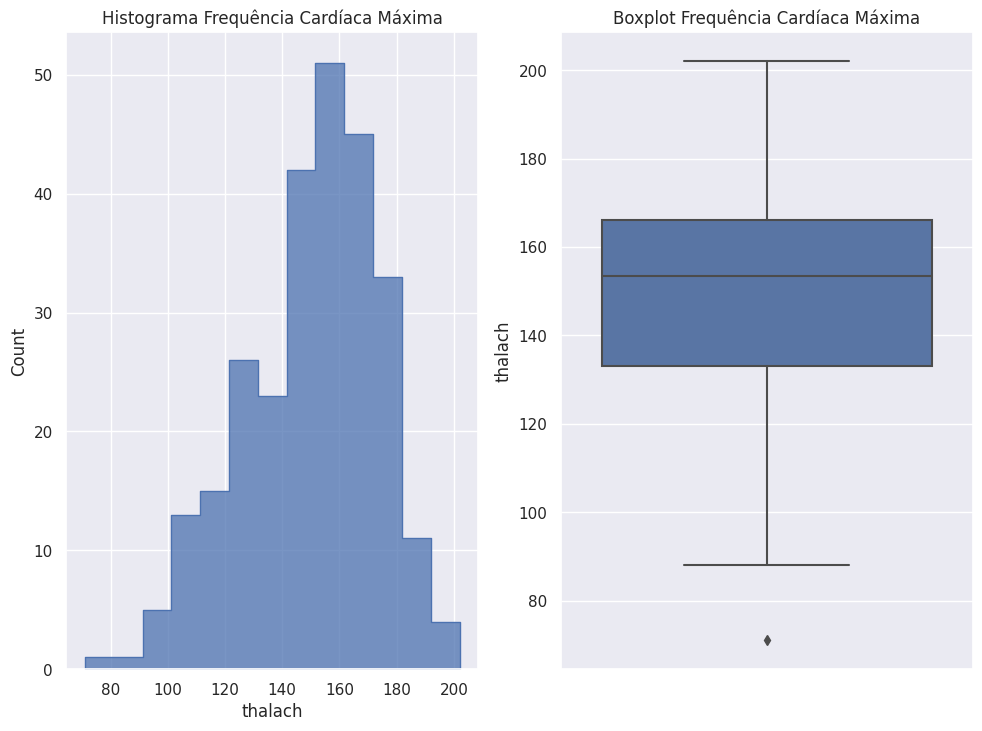

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="thalach", element="step", ax = ax[0]).set_title("Histograma Frequência Cardíaca Máxima")
sns.boxplot( y="thalach", data=df, ax= ax[1]).set_title("Boxplot Frequência Cardíaca Máxima")

**Angina induzida pelo exercício**

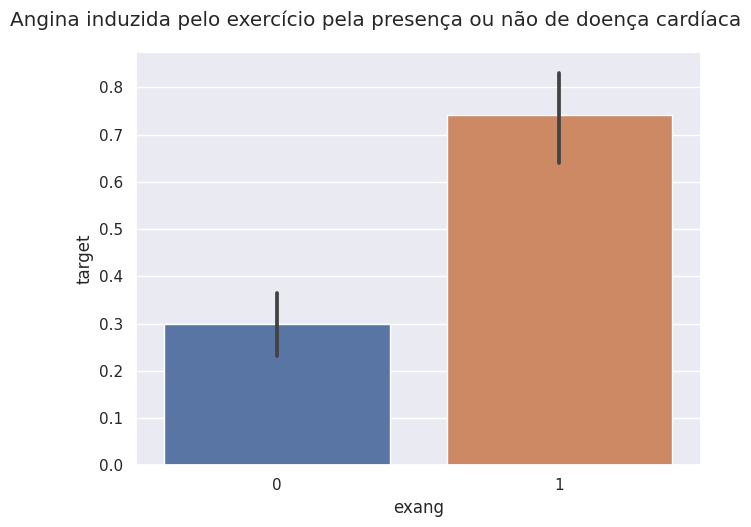

In [ ]:
g = sns.catplot(data=df, x="exang", y="target", kind="bar")
g.fig.suptitle("Angina induzida pelo exercício pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**Depressão do ST induzida pelo exercício em relação ao estado de repouso**

Text(0.5, 1.0, 'Boxplot Depressão do DS')

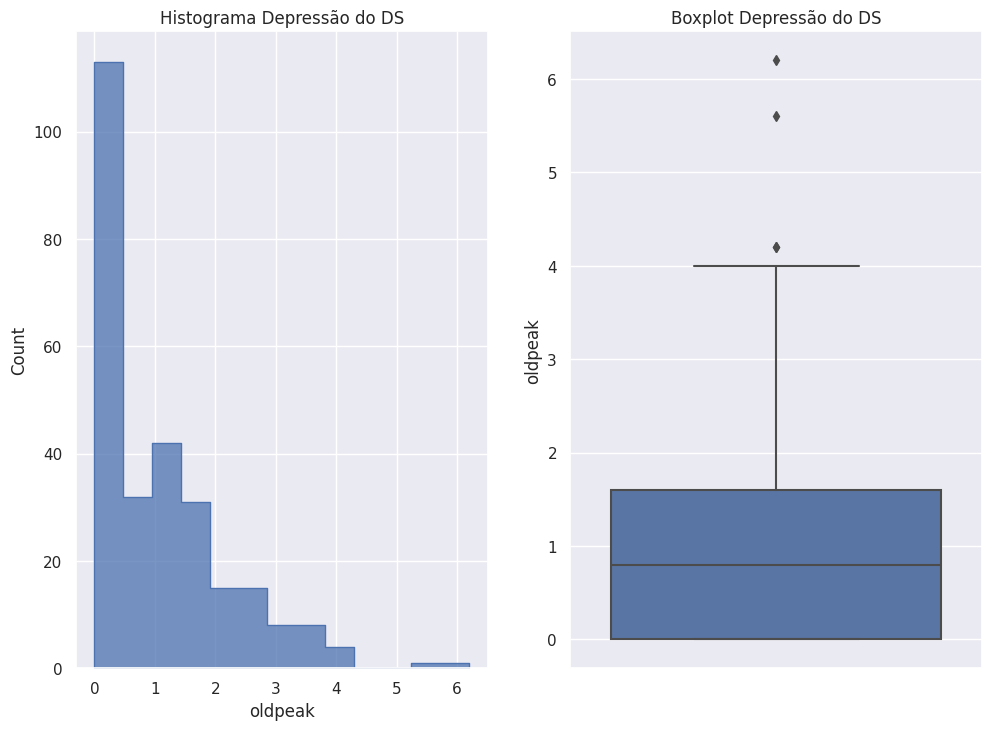

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="oldpeak", element="step", ax = ax[0]).set_title("Histograma Depressão do DS")
sns.boxplot( y="oldpeak", data=df, ax= ax[1]).set_title("Boxplot Depressão do DS")

**Segmento ST medido em termos de inclinação durante o pico do exercício**

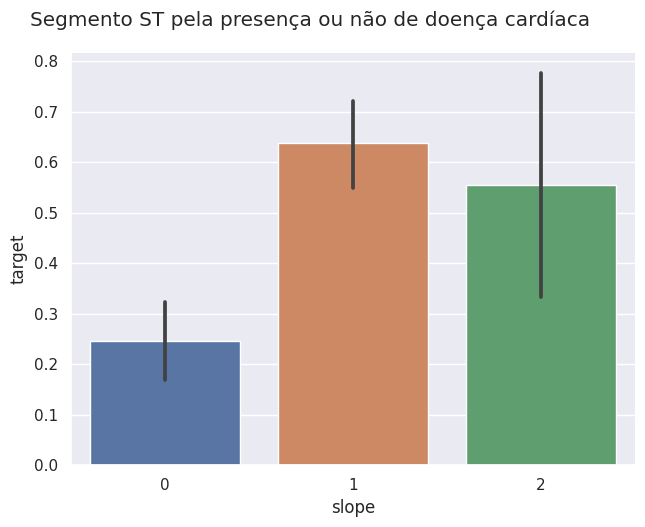

In [ ]:
g= sns.catplot(data=df, x="slope", y="target", kind="bar")
g.fig.suptitle("Segmento ST pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**O número de vasos principais (0–3)**

Text(0.5, 1.0, 'Boxplot Número de Vasos Principais')

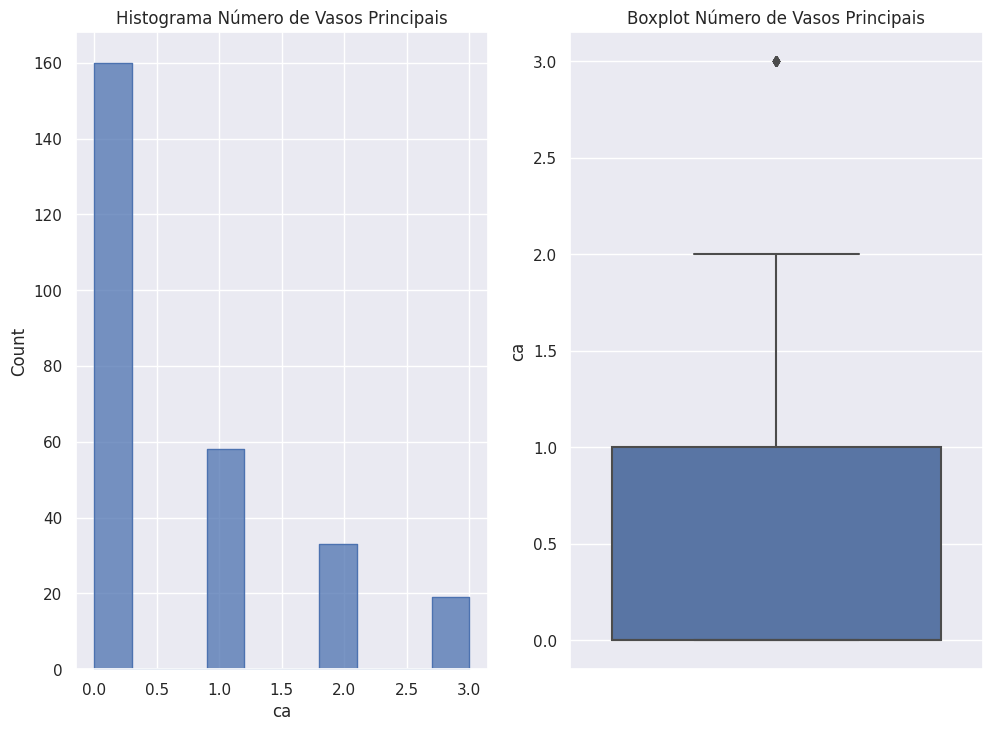

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="ca", element="step", ax = ax[0]).set_title("Histograma Número de Vasos Principais")
sns.boxplot( y="ca", data=df, ax= ax[1]).set_title("Boxplot Número de Vasos Principais")

**Talassemia (distúrbio sanguíneo)**

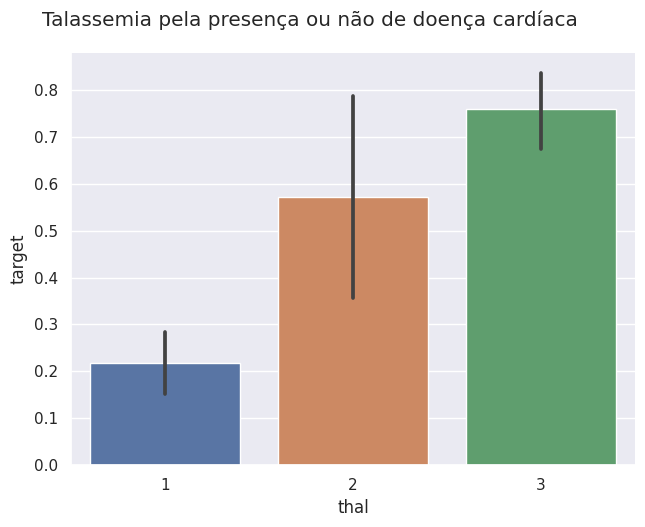

In [ ]:
g = sns.catplot(data=df, x="thal", y="target", kind="bar")
g.fig.suptitle("Talassemia pela presença ou não de doença cardíaca",  y=1.05)
g.fig.set_size_inches(7, 5)
plt.show()

**Se paciente sofre de doença cardíaca ou não (target)**

Text(0.5, 1.0, 'Boxplot Variável Alvo')

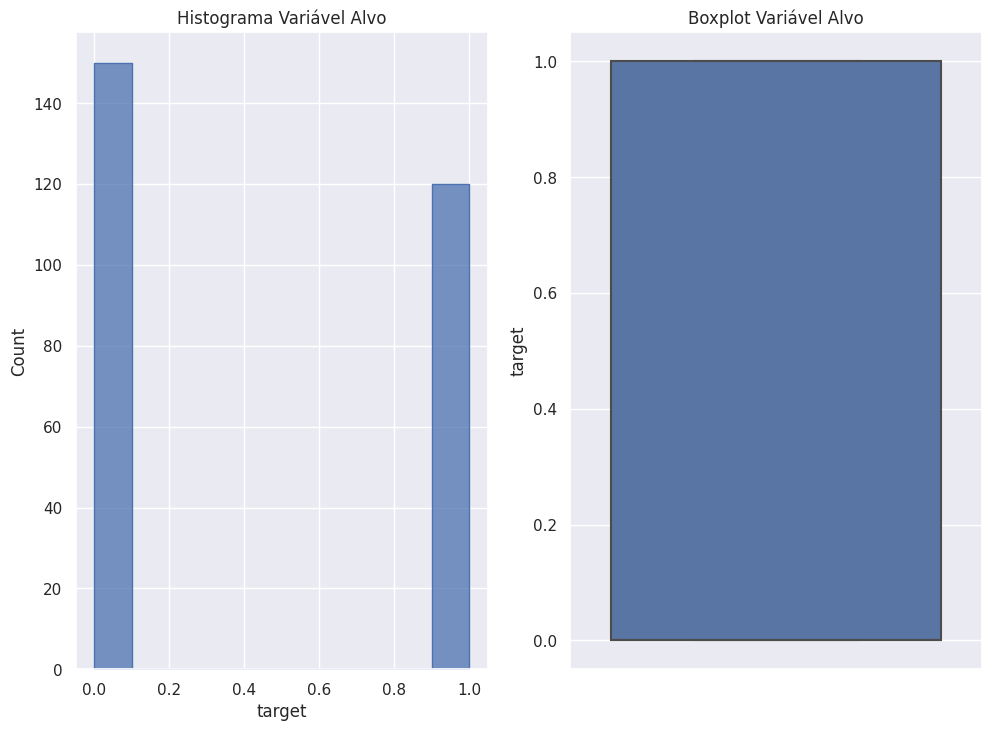

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="target", element="step", ax = ax[0]).set_title("Histograma Variável Alvo")
sns.boxplot( y="target", data=df, ax= ax[1]).set_title("Boxplot Variável Alvo")

# <font color=purple size=5> Análise de variaveis categóricas (qualitativas)

In [ ]:
copy = df.copy()

copy['slope'] = copy['slope'].replace({0: 'inclinação ascendente', 1:'plano', 2:'inclinação descendente' })
copy['target'] = copy['target'].replace({0: 'Sem doença cardíaca', 1:'Com doença cardíaca' })
copy['sex'] = copy['sex'].replace({0: 'Feminino', 1:'Masculino' })
copy['cp'] = copy['cp'].replace({0:'angina tipica', 1: 'angina atipica', 2 :'dor não anginosa',3 :'assintomática'})
copy['fbs'] = copy['fbs'].replace({0:'Falso', 1:'Verdadeiro'})
copy['restecg'] = copy['restecg'].replace({0: 'Normal', 1: 'anormalidade onda ST-T' , 2: 'provável hipertrofia V. E.'})
copy['exang'] = copy['exang'].replace({0:'Não', 1:'Sim'})
copy['slope'] = copy['slope'].replace({0: 'Inclinação ascendente' , 1: 'Plano', 2: 'Inclinação descendente'})
copy['ca'] = copy['ca'].replace({0:'Nenhum', 1:'Um', 2: 'Dois', 3: 'Três'})
copy['thal'] = copy['thal'].replace({0: 'NULO', 1: 'fluxo normal', 2: 'defeito fixo', 3: 'defeito reversível'})

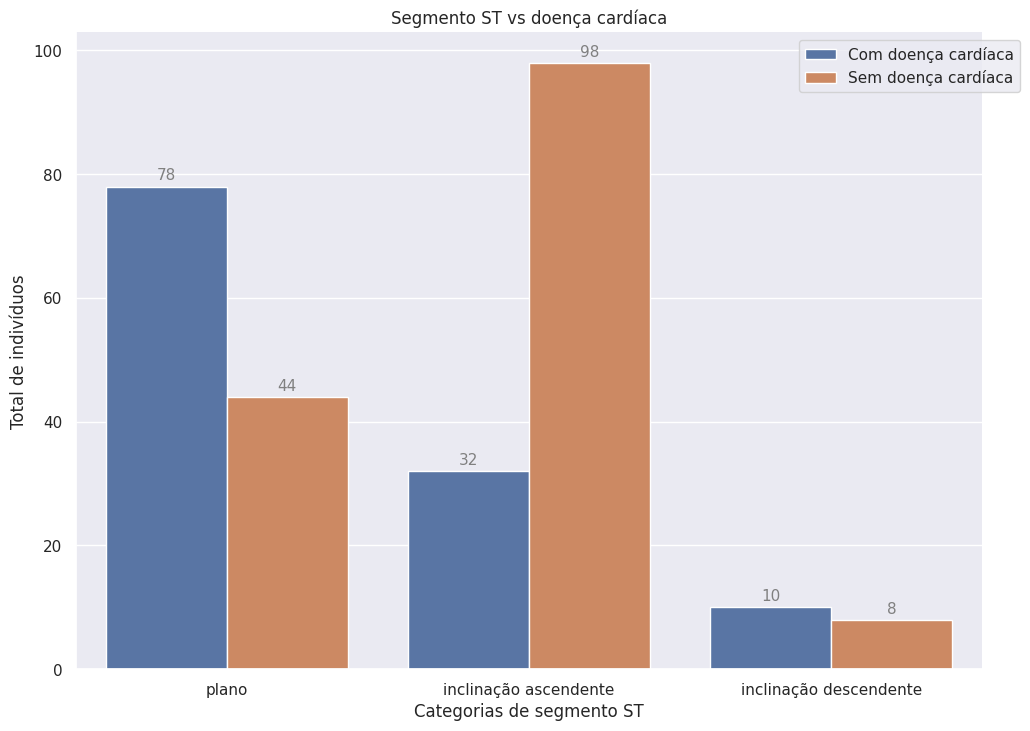

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='slope', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("Segmento ST vs doença cardíaca")

# Adicionar legendas nos eixos x e y
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Categorias de segmento ST")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

### <font color=purple size=5>Gráfico de barras

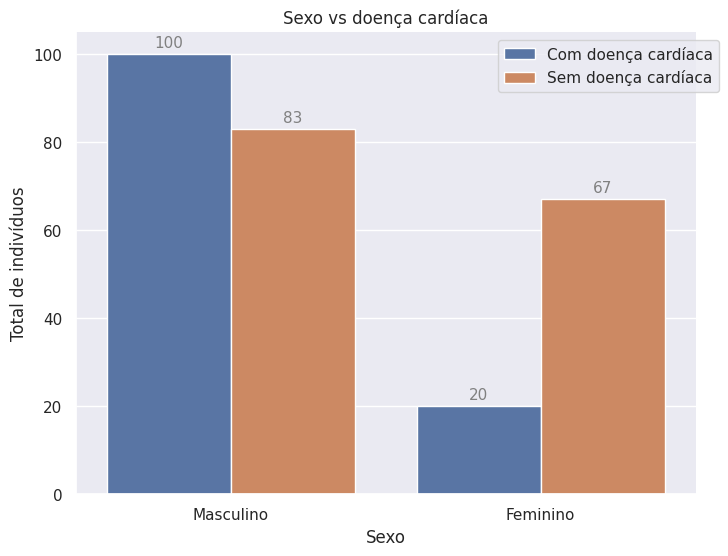

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='sex', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("Sexo vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Sexo")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

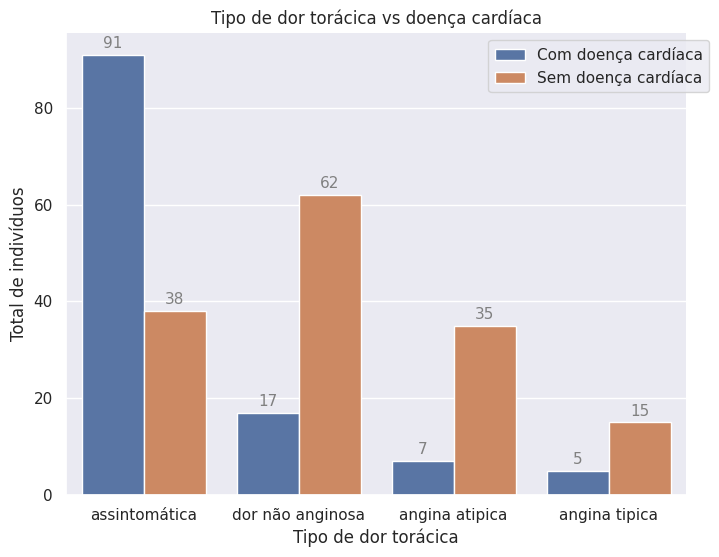

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='cp', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("Tipo de dor torácica vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Tipo de dor torácica")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

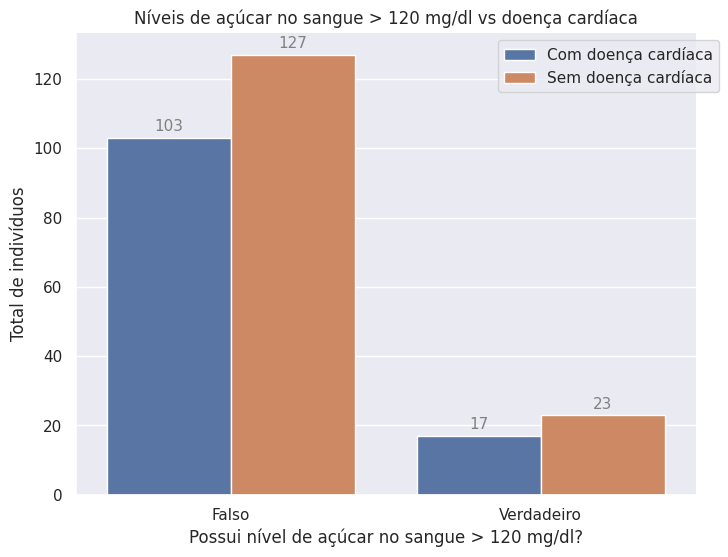

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='fbs', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("Níveis de açúcar no sangue > 120 mg/dl vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Possui nível de açúcar no sangue > 120 mg/dl?")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

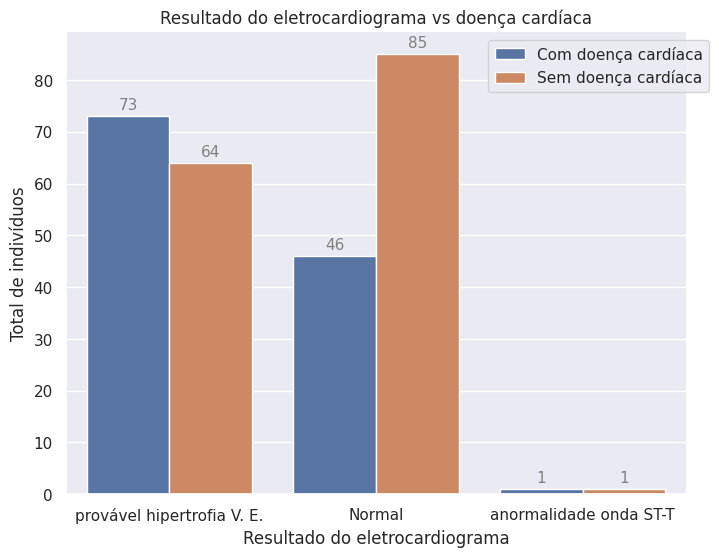

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='restecg', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("Resultado do eletrocardiograma vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Resultado do eletrocardiograma")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

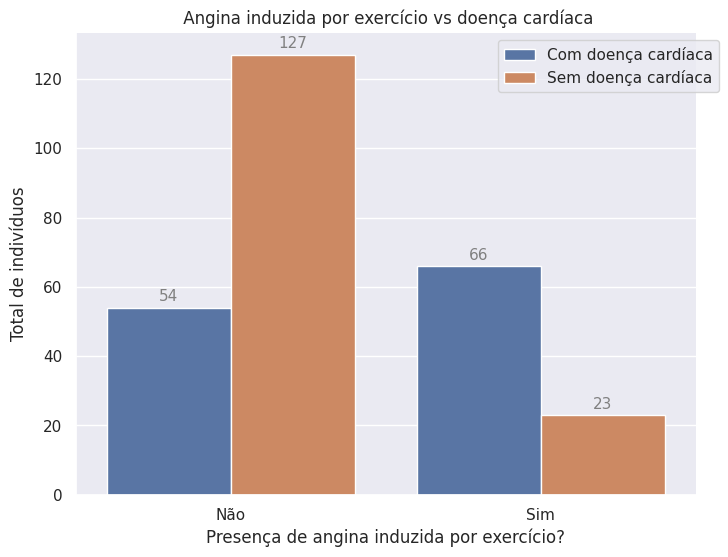

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='exang', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title(" Angina induzida por exercício vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Presença de angina induzida por exercício?")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

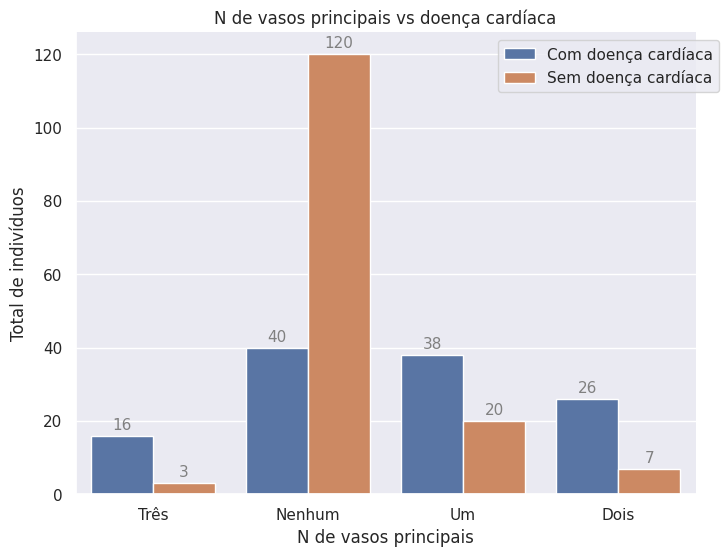

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='ca', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("N de vasos principais vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("N de vasos principais")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

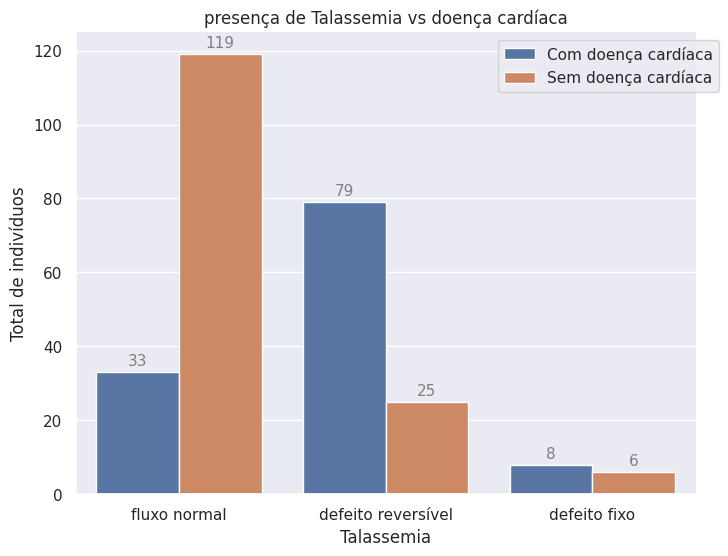

In [ ]:
# Plotar o gráfico de barras
ax = sns.countplot(x='thal', hue='target', data=copy)

# Adicione anotações para exibir os valores da coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# Adicionar um título
ax.set_title("presença de Talassemia vs doença cardíaca")
ax.set_ylabel("Total de indivíduos")
ax.set_xlabel("Talassemia")

# Mostrar o gráfico
sns.despine()
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
sns.set(rc={'figure.figsize':(8,6)})

### <font color=purple size=5>Teste qui quadrado



O teste qui-quadrado dentre outras finalidades, pode ser utilizado para avaliar a associação entre duas variáveis qualitativas nominais X e Y. 
As hipóteses desse teste são:
* H0:  p-value > 0,05. Não há associação entre as variáveis.
(casualidade).


* H1: p-value < 0,05. Há associação entre as variáveis. Os grupos estão associados.

* OBS: 
** Se houver ocorrência de algum zero na tabela de contingência dos dados observados, é necessário usar o teste de Fisher, e não o de qui quadrado
** Se 20% ou mais da frequência esperada for menor que 5, é utilizado o teste de Fisher

In [ ]:
from scipy.stats import chi2_contingency

**Sexo vs target**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['sex'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 1.926e-06


**Tipo de dor torácica sentida pelo paciente vs Target**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['cp'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 8.561e-15


**Níveis de açúcar no sangue**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['fbs'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 0.9237


**Resultado do eletrocardiograma vs Target:**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['restecg'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) #Essa
print(f'p-value = {p:.4}')

p-value = 0.01122


**Angina induzida pelo exercício vs Target:**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['exang'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 1.384e-11


**Segmento ST medido em termos de inclinação durante o pico do exercício vs Target:**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['slope'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 1.713e-09


**Número de vasos principais vs Target:**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['ca'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 1.437e-13


**Talassemia (tipo de anemia) vs Target**

In [ ]:
tabela_var_vs_target = pd.crosstab(index = df['thal'],columns=df['target'])
chi, p, dof, array = chi2_contingency(tabela_var_vs_target) 
print(f'p-value = {p:.4}')

p-value = 6.419e-17


### Resultado da análise qualitativa

De acordo com a análise exploratória dos dados qualitativos e os resultados do teste de Qui-quadrado, podemos considerar que as variáveis mais associadas são 'thal', 'cp', 'ca', 'slope', 'restecg', 'exang' e 'sex', possui resultado significativo para a presença de associação com a variável Target. 

# <font color=purple size=5>Análise de variaveis numéricas (quantitativas)



In [ ]:
numericas = df.drop(columns=['sex','cp','fbs','restecg','exang','slope','ca','thal', 'target'])

**Análise da correlação entre as variáveis**

In [ ]:
corr = numericas.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.273053,0.220056,-0.402215,0.194234
trestbps,0.273053,1.000000,0.173019,-0.039136,0.222800
chol,0.220056,0.173019,1.000000,-0.018739,0.027709
thalach,-0.402215,-0.039136,-0.018739,1.000000,-0.349045
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000


**Análise de distribuição das variáveis quantitaivas numéricas**

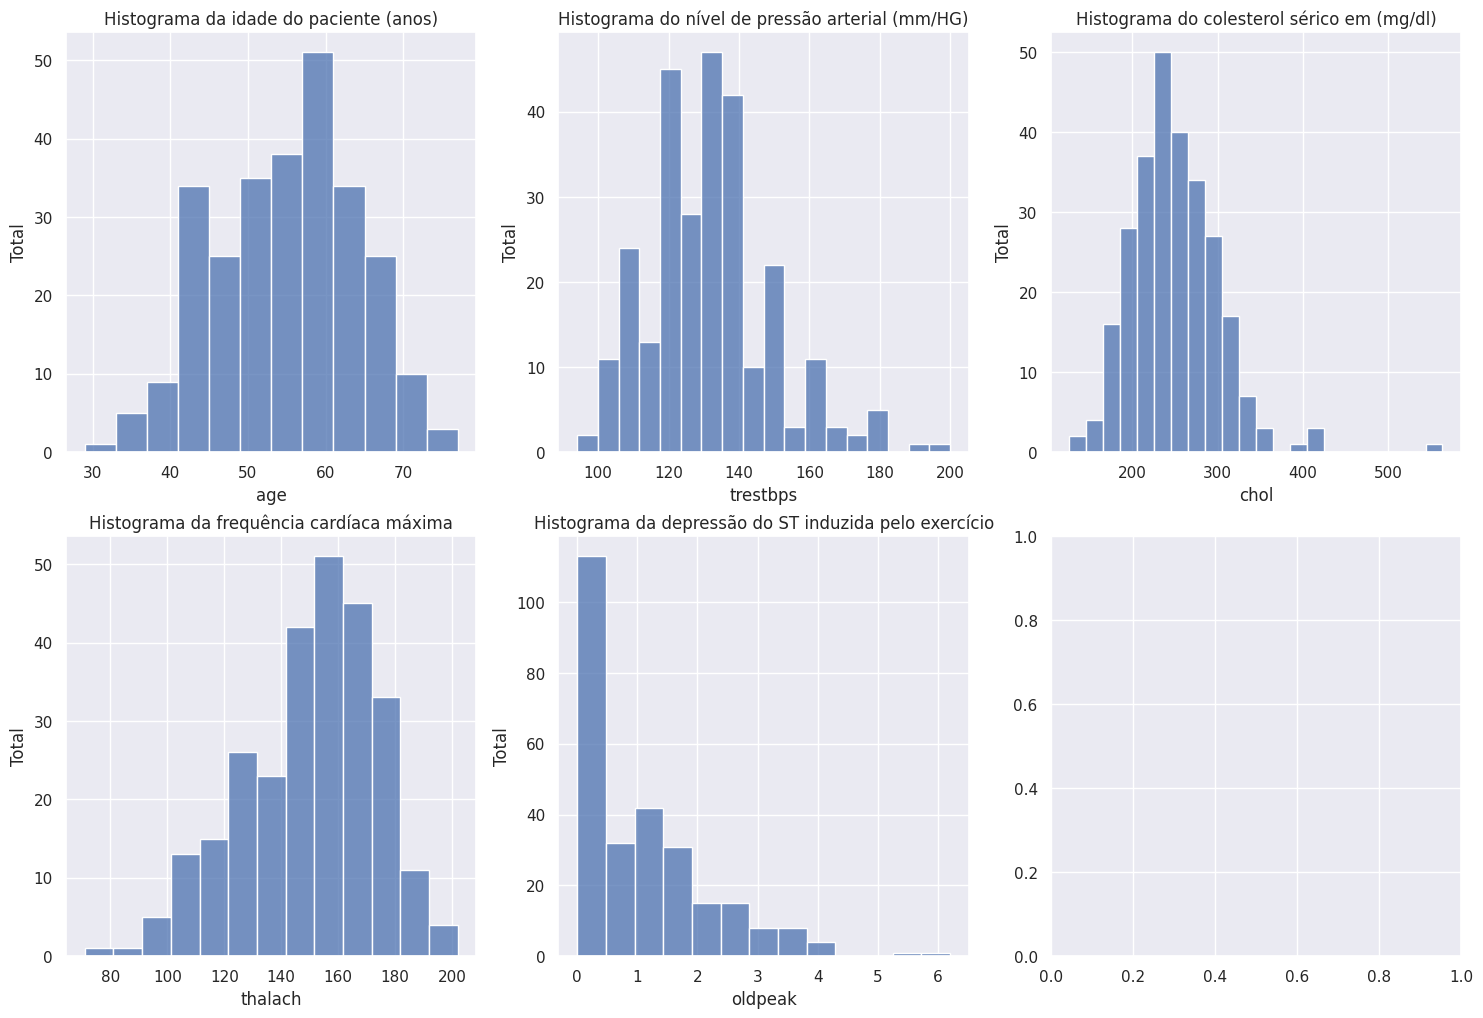

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.set_style('darkgrid')

# Define a paleta de cores
sns.set_palette('husl')

# Plotando os histogramas em cada subplot
sns.histplot(ax=axs[0,0], data=numericas['age'], kde=False)
sns.histplot(ax=axs[0,1], data=numericas['trestbps'], kde=False)
sns.histplot(ax=axs[0,2], data=numericas['chol'], kde=False)
sns.histplot(ax=axs[1,0], data=numericas['thalach'], kde=False)
sns.histplot(ax=axs[1,1], data=numericas['oldpeak'], kde=False)

# Definindo o título de cada subplot
axs[0,0].set_title('Histograma da idade do paciente (anos)')
axs[0,1].set_title('Histograma do nível de pressão arterial (mm/HG)')
axs[0,2].set_title('Histograma do colesterol sérico em (mg/dl)')
axs[1,0].set_title('Histograma da frequência cardíaca máxima')
axs[1,1].set_title('Histograma da depressão do ST induzida pelo exercício')

axs[0,0].set_ylabel('Total')
axs[0,1].set_ylabel('Total')
axs[0,2].set_ylabel('Total')
axs[1,0].set_ylabel('Total')
axs[1,1].set_ylabel('Total')

# Exibindo o gráfico
plt.show()

## <font color=purple size=5>**Teste de hipóstese T-Student**

O teste T-student é utilizado para verificar se existe diferença significativa entre as médias de duas amostras independentes.


Definidas as hipóteses nula e alternativa:


*   H0: p > a. As médias das duas amostras são iguais.

* Ha: p > a. As médias das duas amostras são diferentes.

E o nível de significância α = 0.05




In [ ]:
copy =  df.copy()
copy['target'] = copy['target'].replace({0: 'Não', 1:'Sim' })

def compare_variable(column, ylabel, title):
  # Crie o gráfico de boxplot
  ax = sns.boxplot(x='target', y=column, data=copy, linewidth=1.5, palette="Blues")

  # Defina o título do gráfico
  ax.set_title(title)

  # Defina as legendas dos eixos x e y
  ax.set_xlabel("Possui doença cardíaca")
  ax.set_ylabel(ylabel)

  # Exiba o gráfico
  sns.despine(left=True)
  plt.show()

  grupo1 = copy[copy['target'] == 'Sim'][column]
  grupo2 = copy[copy['target'] == 'Não'][column]

  resultado = ttest_ind(grupo1, grupo2)

  print('As médias entre as variáveis são significativamente diferentes? ')
  if resultado.pvalue < 0.05:
    print('Sim')
  else:
    print('Não')

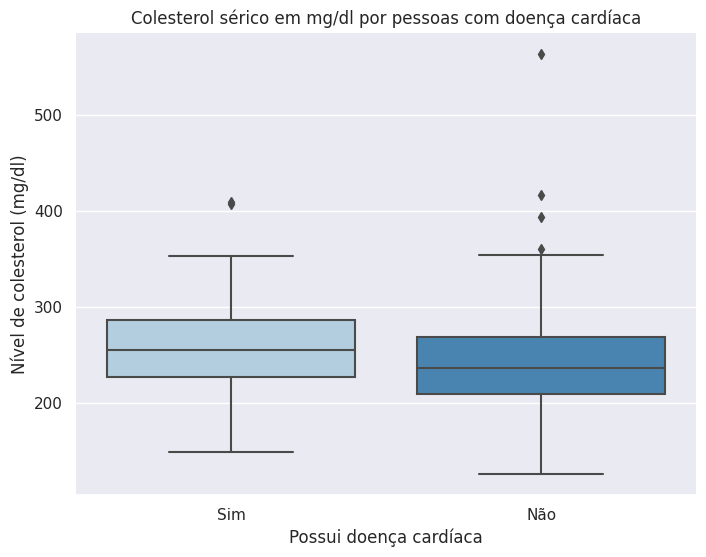

As médias entre as variáveis são significativamente diferentes? 
Não


In [ ]:
compare_variable(column='chol', ylabel="Nível de colesterol (mg/dl)", title="Colesterol sérico em mg/dl por pessoas com doença cardíaca")

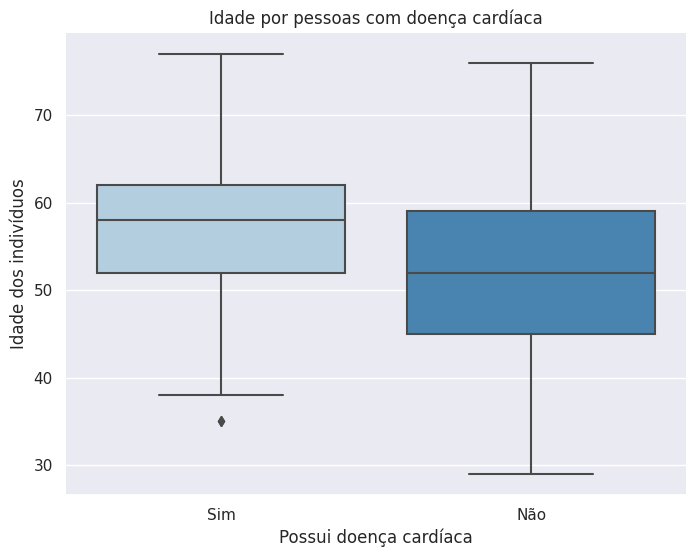

As médias entre as variáveis são significativamente diferentes? 
Sim


In [ ]:
compare_variable(column='age', ylabel="Idade dos indivíduos", title="Idade por pessoas com doença cardíaca")

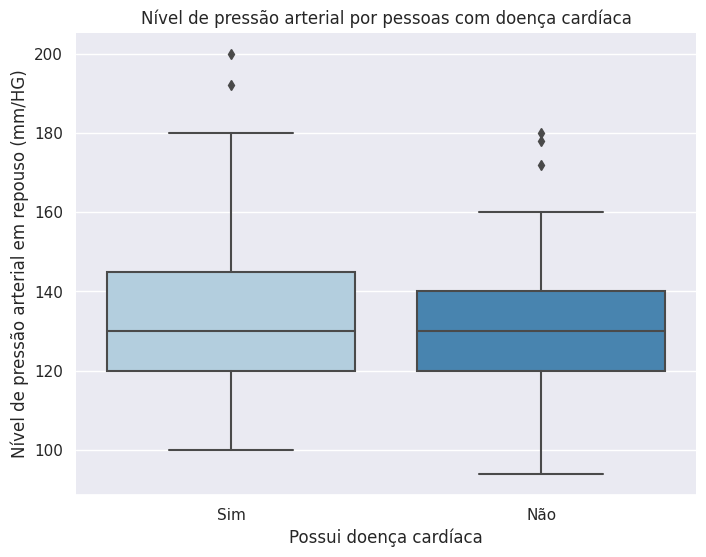

As médias entre as variáveis são significativamente diferentes? 
Sim


In [ ]:
compare_variable(column='trestbps', ylabel="Nível de pressão arterial em repouso (mm/HG)", title="Nível de pressão arterial por pessoas com doença cardíaca")

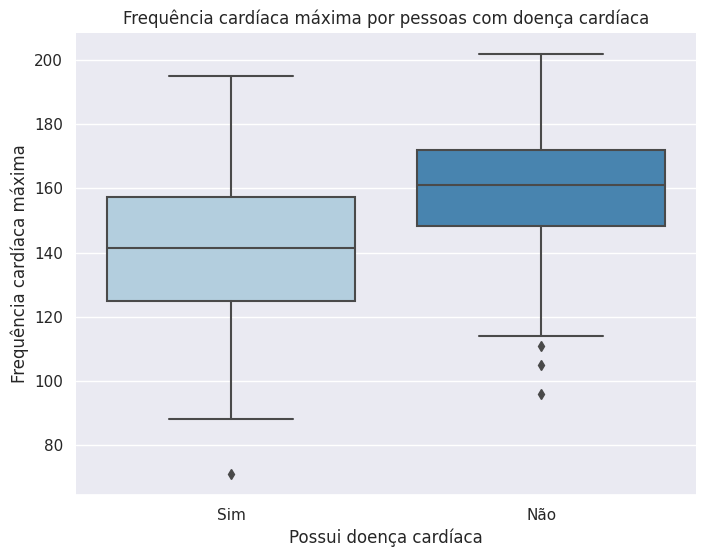

As médias entre as variáveis são significativamente diferentes? 
Sim


In [ ]:
compare_variable(column='thalach', ylabel="Frequência cardíaca máxima", title="Frequência cardíaca máxima por pessoas com doença cardíaca")

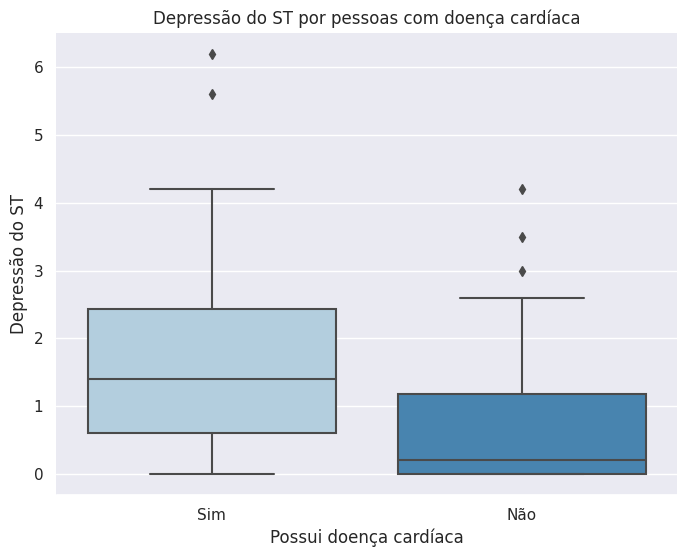

As médias entre as variáveis são significativamente diferentes? 
Sim


In [ ]:
compare_variable(column='oldpeak', ylabel="Depressão do ST", title="Depressão do ST por pessoas com doença cardíaca")

### <font color=purple size=5> Resultado da análise das variáveis quantitativas


De acordo com a análise exploratória dos dados quantitativos e os resultados do teste de T-Student, podemos considerar que as variáveis mais associadas são 'age', 'oldpeak', 'trestbps' e 'thalach', possui uma diferença significativa entre a média com a variável Target. 

# <font color=purple size=5>Modelo de regressão logística 

**Transformação em dummys**

In [ ]:
dados_dummies = pd.get_dummies(df, columns=['cp', 'ca', 'thal', 'sex', 'restecg', 'exang', 'slope'], drop_first=True)
dados = dados_dummies.drop(columns=['chol','fbs'])
dados.head()

<ipython-input-51-5b7b2fc6015b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dados_dummies = pd.get_dummies(df, columns=['cp', 'ca', 'thal', 'sex', 'restecg', 'exang', 'slope'], drop_first=True)
<ipython-input-51-5b7b2fc6015b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dados_dummies = pd.get_dummies(df, columns=['cp', 'ca', 'thal', 'sex', 'restecg', 'exang', 'slope'], drop_first=True)
<ipython-input-51-5b7b2fc6015b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dados_dummies = pd.get_dummies(df, columns=['cp', 'ca', 'thal', 'sex', 'restecg', 'exang', 'slope'], drop_first=True)
<ipython-input-51-5b7b2fc6015b>:1: FutureWarning: In a future version, the Index cons

,age,trestbps,thalach,oldpeak,target,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,thal_2,thal_3,sex_1,restecg_1,restecg_2,exang_1,slope_1,slope_2
0,70,130,109,2.4,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
1,67,115,160,1.6,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
2,57,124,141,0.3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,64,128,105,0.2,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0
4,74,120,121,0.2,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


**Separando em dados X (variáveis independentes) e y (target ou variável dependente)**

In [ ]:
y = dados['target']
x = dados.drop(columns = 'target')

 **Printando os valores das variáveis independentes X (formato de matriz)**

In [ ]:
x

,age,trestbps,thalach,oldpeak,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,thal_2,thal_3,sex_1,restecg_1,restecg_2,exang_1,slope_1,slope_2
0,70,130,109,2.4,0,0,1,0,0,1,0,0,1,0,1,0,1,0
1,67,115,160,1.6,0,1,0,0,0,0,0,1,0,0,1,0,1,0
2,57,124,141,0.3,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,64,128,105,0.2,0,0,1,1,0,0,0,1,1,0,0,1,1,0
4,74,120,121,0.2,1,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,162,0.5,0,1,0,0,0,0,0,1,1,0,0,0,0,0
266,44,120,173,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
267,56,140,153,1.3,1,0,0,0,0,0,0,0,0,0,1,0,1,0
268,57,140,148,0.4,0,0,1,0,0,0,1,0,1,0,0,0,1,0


 **Printando os valores da variável dependente y (formato de vetor)**

In [ ]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64

**Dividindo os dados em treinamento e testes**


In [ ]:
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

**Verificando o tamanho das bases de treino e de teste**

In [ ]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]
print('A base de teste de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de teste de treino tem 189 elementos e a base de teste tem 81 elementos.


**Aplicando o algoritmo de regressão logística e calculando a acurácia de treino**

In [ ]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
round(modelo.score(treino_x, treino_y), 3)*100

87.3

**Exibindo a tabela resumo**

In [ ]:
reg_log = sm.Logit(treino_y, treino_x).fit()
print(reg_log.summary())

         Current function value: 0.304995
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  189
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                           17
Date:                Wed, 17 May 2023   Pseudo R-squ.:                  0.5543
Time:                        10:32:31   Log-Likelihood:                -57.644
converged:                      False   LL-Null:                       -129.35
Covariance Type:            nonrobust   LLR p-value:                 4.748e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0498      0.028     -1.764      0.078      -0.105       0.006
trestbps       0.0235      0.015      1.569      0.117      -0.00

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


*Ao excluir as variáveis sem relevância (p>0,05), observadas na tabela resumo, e aplicar o algoritmo de regressão logística, novamente, houve uma redução na acurácia de teste, além de redução da AOC e piora da matriz de confusão. Sendo assim, optou-se por manter as variáveis.*

**Aplicando o método predict na base de teste**


In [ ]:
previsoes = modelo.predict(teste_x)
previsoes

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

**Calculando a acurácia de teste a partir das previsões**


In [ ]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

84.0

**Aplicando o método score (outra forma de calcular a acurácia)**


In [ ]:
round(modelo.score(teste_x, teste_y), 3)*100

84.0

*Tem-se como resultado a probabilidade de acerto entre os valores previstos e os reais fornecidos*

**Aplicando o método predict_proba**


In [ ]:
modelo.predict_proba(teste_x)

array([[0.04739532, 0.95260468],
       [0.98779227, 0.01220773],
       [0.01313976, 0.98686024],
       [0.89871781, 0.10128219],
       [0.96683267, 0.03316733],
       [0.99297881, 0.00702119],
       [0.97154188, 0.02845812],
       [0.70658816, 0.29341184],
       [0.01284191, 0.98715809],
       [0.74884696, 0.25115304],
       [0.56960546, 0.43039454],
       [0.0199063 , 0.9800937 ],
       [0.06114347, 0.93885653],
       [0.7684594 , 0.2315406 ],
       [0.84003741, 0.15996259],
       [0.03944305, 0.96055695],
       [0.76571248, 0.23428752],
       [0.05235024, 0.94764976],
       [0.95938335, 0.04061665],
       [0.95245193, 0.04754807],
       [0.83535193, 0.16464807],
       [0.85341171, 0.14658829],
       [0.98322379, 0.01677621],
       [0.93076247, 0.06923753],
       [0.69259645, 0.30740355],
       [0.41195853, 0.58804147],
       [0.59354427, 0.40645573],
       [0.99294333, 0.00705667],
       [0.20905915, 0.79094085],
       [0.01200436, 0.98799564],
       [0.

*Esse método define a probabilidade do paciente sofrer uma doença cardíaca.*

*Exemplo: Para a linha 1, têm-se as seguintes probabilidades de sofrer uma doença cardíaca:*
- A probabilidade de pertencer a classe 0, que significa que o paciente é normal, é de 0.047;
- A probabilidade de pertencer a classe 1, que significa que o paciente sofre de doença cardíaca, é de 0.953.

**Plotando a matriz de confusão**


In [ ]:
matriz_confusao = confusion_matrix(teste_y, previsoes)
print(matriz_confusao)

[[41  2]
 [11 27]]


**Visualizando a matriz de confusão**


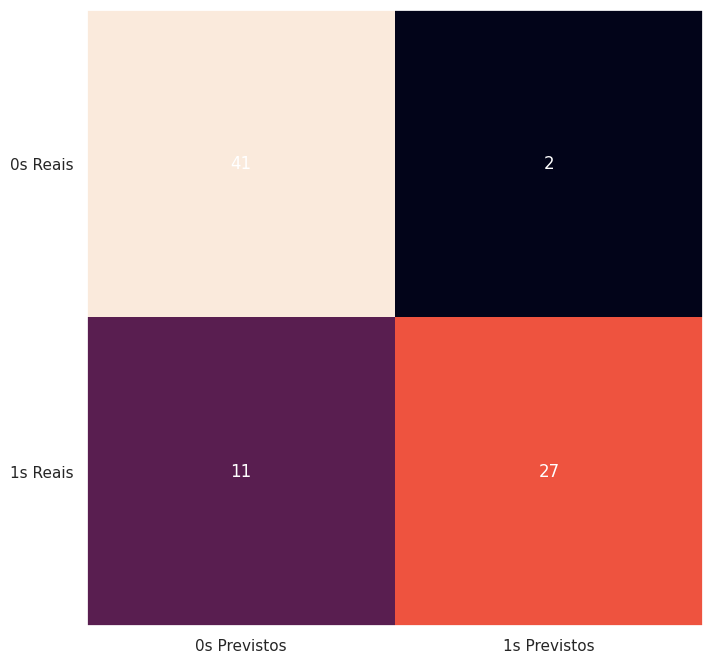

In [ ]:
cm = confusion_matrix(teste_y, previsoes)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Previstos', '1s Previstos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Reais', '1s Reais'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

*O resultado mostra que foram obtidas 68 (41+27) previsões corretas 13 (11+2) previsões incorretas.*

*A matriz obtida mostra o seguinte:* 
- 41 previsões negativas verdadeiras: As 41 primeiras observações são zeros previstos corretamente;

- 11 previsões negativas falsas: são aquelas previstas erroneamente como zeros;

- 2 previsões positivas falsas: são aquelas previstas erroneamente como um;

- 27 previsões positivas verdadeiras: são aquelas previstas corretamente como um.

**Organizando e compilando as funções derivadas da matriz de confusão**


In [ ]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        43
           1       0.93      0.71      0.81        38

    accuracy                           0.84        81
   macro avg       0.86      0.83      0.83        81
weighted avg       0.86      0.84      0.84        81



*84% de acurácia: a cada 100 casos, o modelo acerta 84 casos.*

*Precisão: proporção de predições corretas de uma categoria em relação a todas as predições desta categoria.*

*Recall: Proporção de predições corretas de categoria alvo.*

*F1-Score: Média harmônica entre precisão e recall.*

*Support: a quantidade absoluta de casos encontrados em cada categoria.*

**Gráfico de curva ROC**

roc_auc 0.9149326805385557


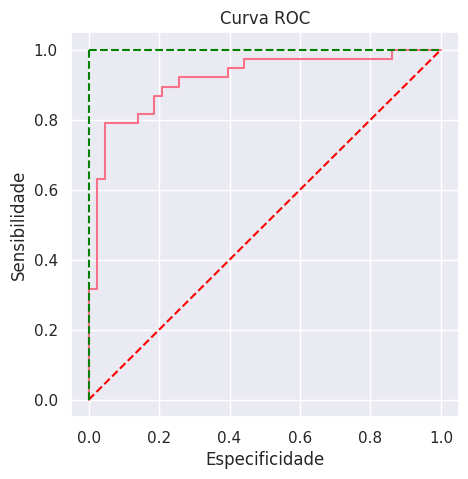

In [ ]:
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp: taxa de falsos positivos
#tvp: taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize = (5,5))
plt.title ('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0,1], ls="--", c= 'red')

plt.plot([0,0],[1,0], ls="--", c= 'green'), plt.plot([1,1], ls="--", c= 'green')

plt.show()

*Linha vermelha: representa um modelo completamente aleatório, onde todas as previsões do modelo não seguem nenhuma tendência de dados / regra;*

*Linha verde: indica um modelo perfeito, onde todas as predições estão corretas;*

*AUC: área sob a curva ROC; quantifica a curva ROC, ou seja, através da área sob a curva, avalia o resultado do gráfico.*

*Convenção Estatística:*

- área < 0,7: baixa discriminação;
- 0,7 ≤ área < 0,8: discriminação aceitável;
- 0,8 ≤ área < 0,9: discriminação excelente;
- área > 0,9: discriminação excepcional.

AUC = 0,915 -> o modelo gerou uma **discriminação excepcional.**

# <font color=purple size=5>**CONCLUSÃO**
 

# <font color=purple size=5> **As 5 principais "causas" de doenças cardíacas**


# <font color=purple size=4> Considerando o impacto das variáveis sobre a causalidade com as doenças cardíacas, foram observadas aquelas que possuíam p-valor menor que 0,05. A primeira variável mais significativa é a existência de 2 vasos principais, que tem efeito positivo, ou seja, mais provável de possuir doenças cardíacas, seguido de 1 e 3 vasos principais, também diretamente proporcionais. A próxima variável mais importante diz respeito à dor torácica, especificamente a classificada como assintomática, influenciando o resultado final de forma direta, com inclinação de 1,784. Por fim, a talassemia ㅡ que é uma uma doença hereditária que pode se manifestar de formas diferentes e tem sintomas como palidez, icterícia, atraso no crescimento ㅡ impacta diretamente no modelo de doenças cardíacas, mas na condição de reversível.